# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [31]:
%matplotlib inline
# import numpy and pandas
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

# Challenge 1 - Analysis of Variance

In this part of the lesson, we will perform an analysis of variance to determine whether the factors in our model create a significant difference in the group means. We will be examining a dataset of FIFA players. We'll start by loading the data using the code in the cell below.

In [2]:
# Run this code:

fifa = pd.read_csv('fifa.csv')

Let's examine the dataset by looking at the `head`.

In [3]:
# Your code here:

fifa.head()

fifa_cleaned = fifa.copy()
fifa_cleaned.columns = fifa_cleaned.columns.str.strip().str.lower().str.replace(' ', '_')
fifa_cleaned

,name,age,nationality,overall,potential,club,value,preferred_foot,position,weak_foot,acceleration,sprintspeed,stamina,strength,longshots,aggression,interceptions,positioning,vision,penalties
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,Left,RF,4.0,91.0,86.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,Right,ST,4.0,89.0,91.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,Right,LW,5.0,94.0,90.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,Right,GK,3.0,57.0,58.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,Right,RCM,5.0,78.0,76.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,J. Lundstram,19,England,47,65,Crewe Alexandra,€60K,Right,CM,2.0,54.0,57.0,40.0,47.0,38.0,46.0,46.0,39.0,52.0,43.0
18203,N. Christoffersson,19,Sweden,47,63,Trelleborgs FF,€60K,Right,ST,2.0,41.0,39.0,43.0,67.0,42.0,47.0,16.0,46.0,33.0,43.0
18204,B. Worman,16,England,47,67,Cambridge United,€60K,Right,ST,3.0,70.0,69.0,55.0,32.0,45.0,32.0,15.0,48.0,43.0,55.0
18205,D. Walker-Rice,17,England,47,66,Tranmere Rovers,€60K,Right,RW,3.0,61.0,60.0,40.0,48.0,34.0,33.0,22.0,44.0,47.0,50.0


Player's values are expressed in millions of euros. We would like this column to be numeric. Therefore, let's create a numeric value column. Do this by stripping all non-numeric characters from each cell. Assign this new data to `ValueNumeric`. There is no need to multiply the value to be expressed in millions. 

In [14]:
# Your code here:
def clean_value(row):
    if 'M' in row:
        return re.sub('[^0-9,.]', '', row)
    else:
        return '.' + re.sub('[^0-9]', '', row)

fifa_cleaned['ValueNumeric'] = fifa_cleaned['value'].apply(clean_value)

fifa_cleaned['ValueNumeric'] = fifa_cleaned['ValueNumeric'].astype(float)
fifa_cleaned['value'].unique()

array(['€110.5M', '€77M', '€118.5M', '€72M', '€102M', '€93M', '€67M',
       '€80M', '€51M', '€68M', '€76.5M', '€44M', '€60M', '€63M', '€89M',
       '€83.5M', '€78M', '€58M', '€53.5M', '€51.5M', '€38M', '€64.5M',
       '€27M', '€81M', '€69.5M', '€59.5M', '€62M', '€73.5M', '€59M',
       '€46M', '€43M', '€36M', '€57M', '€24M', '€30M', '€4M', '€64M',
       '€30.5M', '€62.5M', '€52M', '€45M', '€34M', '€46.5M', '€61M',
       '€41.5M', '€44.5M', '€56.5M', '€53M', '€50M', '€55M', '€36.5M',
       '€45.5M', '€43.5M', '€35M', '€39M', '€18M', '€21.5M', '€50.5M',
       '€54M', '€40.5M', '€37.5M', '€28.5M', '€37M', '€32M', '€26M',
       '€33M', '€38.5M', '€35.5M', '€9M', '€15.5M', '€22M', '€14M',
       '€42.5M', '€31.5M', '€42M', '€25M', '€29.5M', '€31M', '€24.5M',
       '€27.5M', '€29M', '€16.5M', '€23M', '€19M', '€4.2M', '€40M',
       '€41M', '€28M', '€22.5M', '€34.5M', '€32.5M', '€20M', '€26.5M',
       '€25.5M', '€21M', '€13M', '€17.5M', '€11.5M', '€8M', '€6M',
       '€19.5M', '€6.5

#### We'd like to determine whether a player's preffered foot and position have an impact on their value. 

Using the `statsmodels` library, we are able to produce an ANOVA table without munging our data. Create an ANOVA table with value as a function of position and preferred foot. Recall that pivoting is performed by the `C` function.

Hint: For columns that have a space in their name, it is best to refer to the column using the dataframe (For example: for column `A`, we will use `df['A']`).

In [5]:
# Your code here:
from scipy.stats import f_oneway, f

import statsmodels.api as sm
from statsmodels.formula.api import ols 

formula = 'ValueNumeric ~ C(position) + C(preferred_foot)'
model = ols(formula=formula, data=fifa_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(position),16178.968776,26.0,20.445668,3.276447e-94
C(preferred_foot),225.495213,1.0,7.409026,6.495947e-03
Residual,551455.428381,18119.0,NaN,NaN


What is your conclusion from this ANOVA?

In [6]:
# Your conclusions here:
# Debido a que el valor de p es menor a nuestra alfa de 0.05, se rechaza la hipótesis nula ya que es posible que puedan existir diferencias significativas entre la pierna preferida, la posición del jugador y el valor en el mercado.


After looking at a model of both preffered foot and position, we decide to create an ANOVA table for nationality. Create an ANOVA table for numeric value as a function of nationality.

In [20]:
# Your code here:

formula = 'ValueNumeric ~ C(nationality)'
model = ols(formula=formula, data=fifa_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=1)
anova_table


,df,sum_sq,mean_sq,F,PR(>F)
C(nationality),163.0,31880.293898,195.584625,6.581619,6.770838e-129
Residual,18043.0,536180.104218,29.716793,NaN,NaN


What is your conclusion from this ANOVA?

In [15]:
# Your conclusions here:
# Debido a que el valor de p es menor a nuestra alfa de 0.05, se rechaza la hipótesis nula ya que es posible que puedan existir diferencias significativas entre la nacionalidad y el valor en el mercado.


# Challenge 2 - Linear Regression

Our goal with using linear regression is to create a mathematical model that will enable us to predict the outcome of one variable using one or more additional independent variables.

We'll start by ensuring there are no missing values. Examine all variables for all missing values. If there are missing values in a row, remove the entire row.

In [23]:
# Your code here:
null_values = fifa_cleaned.isnull().sum()
null_columns = null_values[null_values.values > 0]
df_clean = fifa_cleaned.dropna()
df_clean.isnull().sum()

name              0
age               0
nationality       0
overall           0
potential         0
club              0
value             0
preferred_foot    0
position          0
weak_foot         0
acceleration      0
sprintspeed       0
stamina           0
strength          0
longshots         0
aggression        0
interceptions     0
positioning       0
vision            0
penalties         0
ValueNumeric      0
dtype: int64

Using the FIFA dataset, in the cell below, create a linear model predicting value using stamina and sprint speed. create the model using `statsmodels`. Print the model summary.

Hint: remember to add an intercept to the model using the `add_constant` function.

In [25]:
# Your code here:

X = sm.add_constant(df_clean[['stamina', 'sprintspeed']])

y = df_clean['ValueNumeric']

Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [28]:
# Your conclusions here:
model = sm.OLS(y,X).fit()
print(model.summary())
# El valor de la R cuadrada es cercano a 0 por lo que el poder de predicción de nuestro modelo se ve adecuado

                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     432.9
Date:                Sat, 07 May 2022   Prob (F-statistic):          2.41e-184
Time:                        23:28:28   Log-Likelihood:                -55941.
No. Observations:               17918   AIC:                         1.119e+05
Df Residuals:                   17915   BIC:                         1.119e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.9138      0.197    -14.814      

Next, create a second regression model predicting value using potential. Create the model using `statsmodels` and print the model summary. Remember to add a constant term.

In [29]:
# Your code here:

X = sm.add_constant(df_clean['potential'])
y = df_clean['ValueNumeric']



Report your findings from the model summary. In particular, report about the model as a whole using the F-test and how much variation is predicted by the model using the r squared.

In [30]:
# Your conclusions here:
model = sm.OLS(y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           ValueNumeric   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     8810.
Date:                Sat, 07 May 2022   Prob (F-statistic):               0.00
Time:                        23:34:08   Log-Likelihood:                -52781.
No. Observations:               17918   AIC:                         1.056e+05
Df Residuals:                   17916   BIC:                         1.056e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.0026      0.401    -87.342      0.0

Plot a scatter plot of value vs. potential. Do you see a linear relationship?

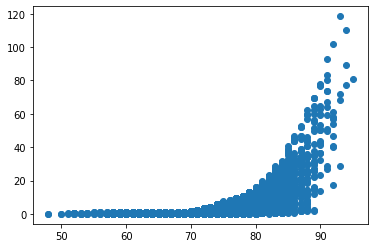

In [34]:
# Your code here:

plt.scatter(df_clean['potential'], df_clean['ValueNumeric']);

In [ ]:
# No parece seguir un comportamiento lineal, sino exponencial.